In [1]:
# Ignoring Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Necessary Libraries and packages

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Loading the data

data = pd.read_csv("../Data/weather_forecast.csv")
df = data.copy()
print(f"Number of rows/records: {df.shape[0]}\nNumber of columns: {df.shape[1]}")
df.sample(5)

Number of rows/records: 14
Number of columns: 5


,Outlook,Temperature,Humidity,Windy,Play
9,Rain,Mild,Normal,Weak,Yes
7,Sunny,Mild,High,Weak,No
4,Rain,Cool,Normal,Weak,Yes
1,Sunny,Hot,High,Strong,No
3,Rain,Mild,High,Weak,Yes


In [4]:
# Encode features
label_encoders = {}
for column in list(df.columns):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [5]:
# Separating the data into X and y for training and testing

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
# Splitting the data into Train and test

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=45)

In [7]:
# Loading the Decision Tree model and creating the classifier

decision_tree = DecisionTreeClassifier()

dt_clf = decision_tree.fit(X_train, Y_train)

In [8]:
# Predicting the performance over test data

y_pred = dt_clf.predict(x_test)

In [15]:
# Finding the accuracy, confusion metric and classification report of the model

accuracy = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the model is: \n{np.round(accuracy*100, decimals=2)}")
print(f"The confusion metrics is: \n{conf}")
print(f"The Classification report is: \n{report}")

Accuracy of the model is: 
100.0
The confusion metrics is: 
[[1 0]
 [0 2]]
The Classification report is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



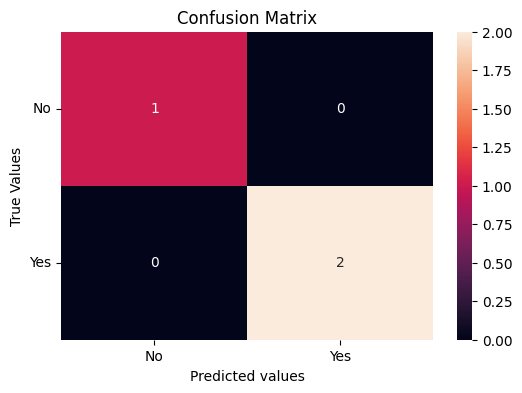

In [10]:
# Plotting the Confision Matrix

plt.figure(figsize=(6,4))
ax = sns.heatmap(conf, annot=True)
ax.set_xticklabels(np.sort(data["Play"].value_counts().keys().to_list()), rotation=0)
ax.set_yticklabels(np.sort(data["Play"].value_counts().keys().to_list()), rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("True Values")
plt.show()

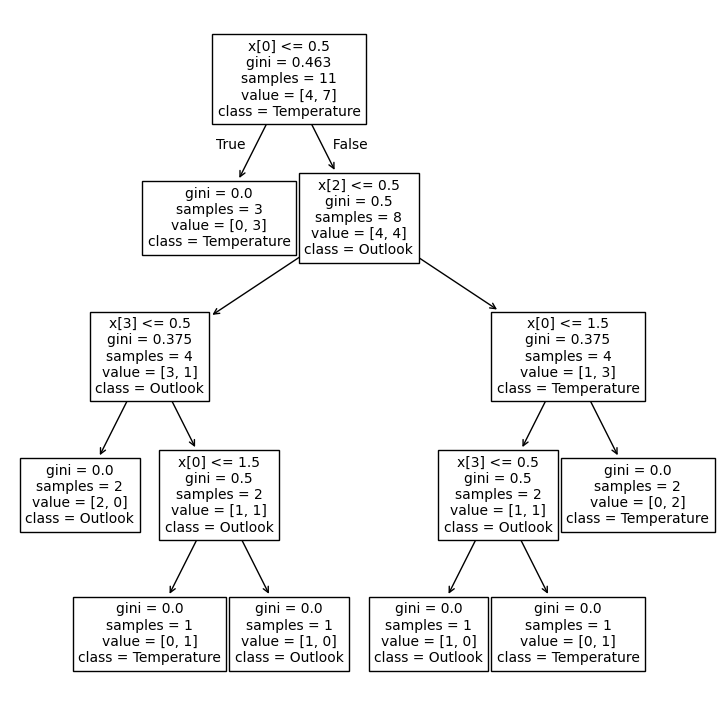

In [11]:
# Plotitng and visualizing the Tree

plt.figure(figsize=(9,9))
tree.plot_tree(dt_clf, class_names=df.columns.to_list(), fontsize=10);

In [12]:
# Display the decision tree rules
tree_rules = export_text(decision_tree, feature_names=X.columns.tolist())
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 0
|   |   |--- Windy >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 1



In [17]:
# Saving the model and encoders and metrics

pickle.dump(decision_tree, open('model.pkl','wb'))
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save only the needed metrics to JSON
report = classification_report(y_test, y_pred, output_dict=True)
metrics_to_save = {
    "accuracy": float(accuracy),
    "precision": report['weighted avg']['precision'],
    "recall": report['weighted avg']['recall'],
    "f1_score": report['weighted avg']['f1-score']
}

with open("metrics.json", "w") as f:
    json.dump(metrics_to_save, f, indent=4)


In [159]:
# Predicting the result
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

new_sample = {
    'Outlook': 'Rain',
    'Temperature': 'Cool',
    'Humidity': 'Normal',
    'Windy': 'Weak'
}

# Encode using same label encoders
encoded_sample = {col: label_encoders[col].transform([val])[0] for col, val in new_sample.items()}
input_df = pd.DataFrame([encoded_sample])

prediction = model.predict(input_df)

# Decode the prediction back to "Yes"/"No"
result = label_encoders['Play'].inverse_transform(prediction)

print("Can play outside?", result[0])

Can play outside? Yes
